In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from pandas import DataFrame,Series
from scipy import stats
from sklearn.linear_model import LinearRegression

# 3. 数据可视化和摘要
## 3.1 数据可视化和摘要
### 数据摘要
首先使用pandas库中的方法将属性划分为标称型和数值型

In [2]:
def object_number_divide(dataset):
    winedata_columns = dataset.columns[1::]
    winedata_object_list = []
    winedata_number_list = []
    for obj in winedata_columns:
        if str(dataset[obj].dtypes)== 'object':
            winedata_object_list.append(obj)
        else:
            winedata_number_list.append(obj)
    return winedata_object_list,winedata_number_list

#### 发现下面中的第一个输出列表['trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'thumbnail_link', 'description']中的属性为标称型，后面的列表['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']为数值型

In [3]:
dataset=pd.read_csv('./CAvideos.csv',header=0,sep='',delimiter=",", encoding='utf-8')
winedata_object_list,winedata_number_list = object_number_divide(dataset)
print(winedata_object_list,winedata_number_list)

['trending_date', 'title', 'channel_title', 'publish_time', 'tags', 'thumbnail_link', 'description'] ['category_id', 'views', 'likes', 'dislikes', 'comment_count', 'comments_disabled', 'ratings_disabled', 'video_error_or_removed']


#### 对标称属性，给出每个可能取值的频数
下面对于每个标称型属性中的属性值求出对应每个可能取值的频数

In [4]:
for wol in winedata_object_list:
    print('*'*30)
    print(wol)
    print(dataset[wol].value_counts())

******************************
trending_date
18.12.06    200
18.19.04    200
18.01.06    200
17.29.11    200
18.30.05    200
18.23.03    200
18.26.05    200
18.28.01    200
18.05.03    200
18.04.05    200
17.01.12    200
17.08.12    200
18.24.04    200
18.21.05    200
18.08.03    200
18.01.04    200
18.06.06    200
18.08.02    200
18.02.01    200
18.12.05    200
17.03.12    200
17.10.12    200
18.13.01    200
18.29.03    200
18.06.05    200
17.21.11    200
18.22.03    200
17.23.12    200
18.05.01    200
17.05.12    200
           ... 
18.22.02    199
18.23.04    199
18.14.04    199
18.11.02    199
18.17.02    199
18.22.01    199
18.14.03    199
17.29.12    199
18.29.04    199
18.15.05    199
18.19.01    199
17.12.12    199
17.04.12    199
17.07.12    198
18.24.02    198
18.06.02    198
18.19.05    198
18.23.02    198
18.27.02    198
18.15.02    198
18.28.02    197
18.09.03    197
18.25.04    197
18.19.03    197
18.29.01    196
18.02.02    195
18.13.02    195
18.31.01    191
18.01.02   

#### 数值属性，给出最大、最小、均值、中位数、四分位数及缺失值的个数。
下面对于数值型属性，求出最大、最小、均值、中位数、四分位数及缺失值的个数。下面的每一行分别对应最小，最大，平均值，中位数，四分位数
和缺失值的个数。

In [5]:
cnt = len(dataset)
for wol in winedata_number_list:
    print('*'*30)
    print(wol)
    print(dataset[wol].min())
    print(dataset[wol].max())
    print(dataset[wol].mean())
    print(dataset[wol].median())
    print(dataset[wol].dropna().quantile(q=[0.25,0.75]))
    print(cnt-dataset[wol].count())

******************************
category_id
1
43
20.795552946356498
24.0
0.25    20.0
0.75    24.0
Name: category_id, dtype: float64
0
******************************
views
733
137843120
1147035.9107898534
371204.0
0.25    143902.0
0.75    963302.0
Name: views, dtype: float64
0
******************************
likes
0
5053338
39582.68824148137
8780.0
0.25     2191.0
0.75    28717.0
Name: likes, dtype: float64
0
******************************
dislikes
0
1602383
2009.1954453168953
303.0
0.25     99.0
0.75    950.0
Name: dislikes, dtype: float64
0
******************************
comment_count
0
1114800
5042.974707076637
1301.0
0.25     417.0
0.75    3713.0
Name: comment_count, dtype: float64
0
******************************
comments_disabled
False
True
0.014260903598248576
0.0
0.25    0.0
0.75    0.0
Name: comments_disabled, dtype: float64
0
******************************
ratings_disabled
False
True
0.00682468628458208
0.0
0.25    0.0
0.75    0.0
Name: ratings_disabled, dtype: float64
0
******

### 数据的可视化
#### 针对数值属性，
##### 绘制直方图，用qq图检验其分布是否为正态分布。
##### 绘制盒图，对离群值进行识别
首先对于views属性进行绘制直方图，QQ图和盒图，我们从QQ图中发现R=0.2708， 不是正态分布，从盒图中发现，离群点的个数很多

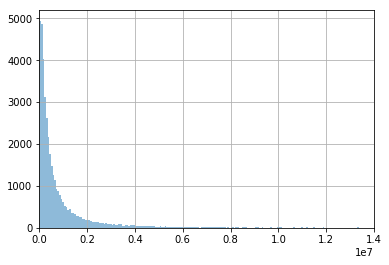

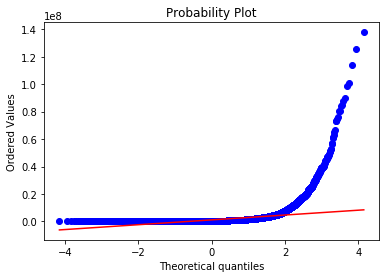

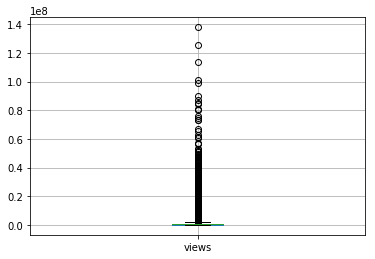

In [6]:
cname = 'views'
plt.xlim(700,14000000)
dataset[cname].hist(alpha=0.5, bins=2000)
plt.show()
stats.probplot(dataset[cname], dist="norm", plot=plt)
plt.show()
data_price=DataFrame(dataset,columns=[cname])
data_price.boxplot()
plt.show()

首先对于likes属性进行绘制直方图，QQ图和盒图，我们从QQ图中发现R=0.2548， 不是正态分布，从盒图中发现，离群点的个数很多

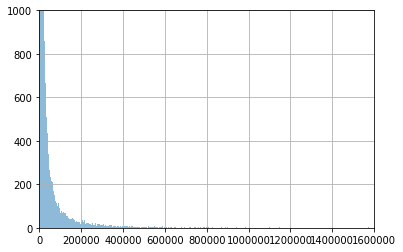

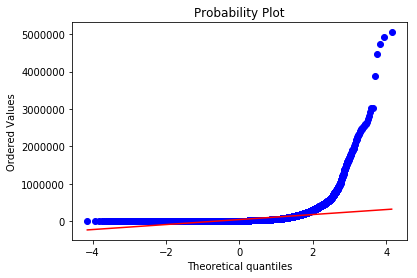

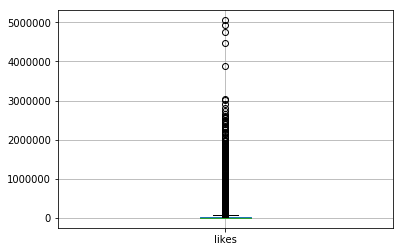

In [7]:
cname = 'likes'
plt.xlim(0,1600000)
plt.ylim(0,1000)
dataset[cname].hist(alpha=0.5, bins=2000)
plt.show()
stats.probplot(dataset[cname], dist="norm", plot=plt)
plt.show()
data_price=DataFrame(dataset,columns=[cname])
data_price.boxplot()
plt.show()

首先对于dislikes属性进行绘制直方图，QQ图和盒图，我们从QQ图中发现R=0.049， 不是正态分布，从盒图中发现，离群点的个数少一些

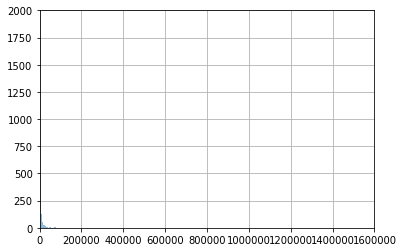

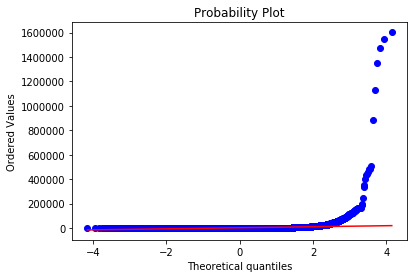

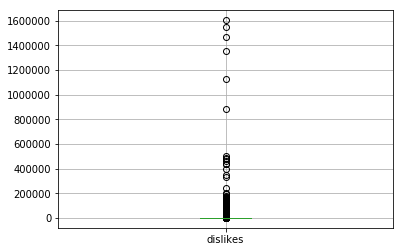

In [8]:
cname = 'dislikes'
plt.xlim(0,1600000)
plt.ylim(0,2000)
dataset[cname].hist(alpha=0.5, bins=2000)
plt.show()
stats.probplot(dataset[cname], dist="norm", plot=plt)
plt.show()
data_price=DataFrame(dataset,columns=[cname])
data_price.boxplot()
plt.show()

首先对于comment_count属性进行绘制直方图，QQ图和盒图，我们从QQ图中发现R=0.1600， 不是正态分布，从盒图中发现，离群点的个数很多

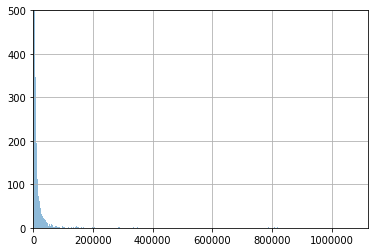

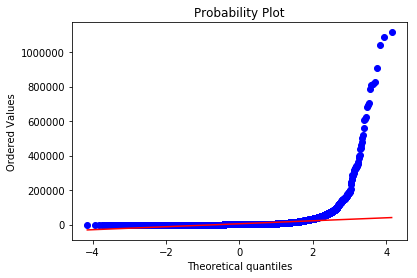

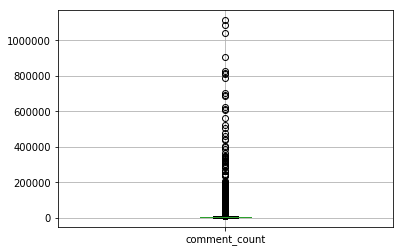

In [9]:
cname = 'comment_count'
plt.xlim(0,1120000)
plt.ylim(0,500)
dataset[cname].hist(alpha=0.5, bins=2000)
plt.show()
stats.probplot(dataset[cname], dist="norm", plot=plt)
plt.show()
data_price=DataFrame(dataset,columns=[cname])
data_price.boxplot()
plt.show()

## 该数据集没有缺失数据，故无法进行缺失值的补充